Counts from random search with N = 100000 simulations to visualize the combinations that lead to "Review" being the best strategy in the unique Nash Equilibrium case and proportion of times the review strategy is the equilibrium.

In [69]:
import os 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'  # clears up blurry images 

sns.color_palette("pastel")
plt.style.use('seaborn-muted')
sns.set_style('ticks')

color_dict_strategy = {"Guess": "tab:blue", "Not_Unique" : "black", "Review": "tab:green"}
color_dict_params = sns.color_palette("crest", as_cmap=True)

# Create the folder to save images based on project directory
project_root_dir = "."
fig_foldername = 'figs_R_W_vary'
figs_path = os.path.join(project_root_dir, fig_foldername)

def save_fig(name, images_path=figs_path, tight_layout=False, extension="png", resolution=300):
    """ Saves figure in the fig folder in project root directory"""
    if not os.path.isdir(images_path):
        os.makedirs(images_path)
    path = os.path.join(images_path, name + "." + extension)
    print("Saving figure:", name)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=extension, dpi=resolution)

In [70]:
payoff_full = pd.read_csv('payoff_R_W_vary.csv')
payoff_full.head();
# Drop rows where there is no equilibrium 
nashexists = payoff_full.dropna()
#nashexists.head()
nashexists.describe();
payoff_full.describe()

,pT,W,R,pL,c,pL*c,pQ,Max_R1_Payoff,Max_R2_Payoff,Max_Payoff,Number_Eqs,Strategy
count,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.5,49.726300,49.990900,0.501455,25.446400,12.709485,1.0,36.733132,39.185832,39.185832,1.810900,1.326600
std,0.0,29.298151,29.168066,0.289728,14.319561,11.020221,0.0,20.889119,20.473325,20.473325,0.986833,0.717624
min,0.5,0.000000,0.000000,0.000193,1.000000,0.000320,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.5,24.000000,25.000000,0.252985,13.000000,3.573216,1.0,20.750000,23.000000,23.000000,1.000000,1.000000
50%,0.5,50.000000,50.000000,0.498811,25.000000,9.650186,1.0,32.250000,37.795000,37.795000,1.000000,1.000000
75%,0.5,75.000000,75.000000,0.755671,38.000000,19.304796,1.0,51.902500,53.750000,53.750000,3.000000,2.000000
max,0.5,100.000000,100.000000,0.999902,50.000000,49.781533,1.0,97.780000,97.780000,97.780000,4.000000,2.000000


In [71]:
#payoff = nashexists.sample(frac=0.5, random_state=1)
payoff = nashexists
print(payoff.columns)
payoff['Strategy_Name'].value_counts()


Index(['pT', 'W', 'R', 'pL', 'c', 'pL*c', 'pQ', 'R1_array', 'R2_array',
       'Max_R1_Payoff', 'Max_R2_Payoff', 'Max_Payoff', 'Eq', 'Number_Eqs',
       'Strategy_Name', 'Strategy'],
      dtype='object')


Not_Unique    4741
Review        3784
Guess         1475
Name: Strategy_Name, dtype: int64

In [72]:
# Subset of payoffs with a unique Nash Equilibrium 
onenash = payoff.loc[payoff['Number_Eqs'] == 1]
onenash.head()
onenash.describe();
# Subset of payoffs with a unique Nash Equilibrium: Strategy to Review

one_nash_review = onenash.loc[onenash['Strategy_Name'] == "Review"]
one_nash_review.head()
one_nash_review.describe();

# Subset of payoffs with a unique Nash Equilibrium: Strategy to Guess

one_nash_guess = onenash.loc[onenash['Strategy_Name'] == "Guess"]
one_nash_guess.head()
one_nash_guess.describe();

In [73]:
# histogram function to control the details and aesthetics 

def my_displot(data = payoff, 
                x='R',
                filename = 'figure', 
                title = "" , 
                hue = 'Strategy_Name', 
                palette = color_dict_strategy, 
                multiple = 'stack', 
                xlabel = 'Specify x axis label',
                hue_order = color_dict_strategy,
                **kwargs):
    g = sns.displot(data = data, x = x, hue=hue, palette=palette, multiple=multiple, hue_order = hue_order, **kwargs)
    g.set_axis_labels(xlabel)
    save_fig(filename)

In [24]:
%%capture
#g = sns.displot(data = payoff, x = 'R', hue='Strategy_Name', palette=color_dict_strategy, multiple='stack', bins = 101)
#hue_order = color_dict_strategy)

Saving figure: c_counts
Saving figure: pL_counts
Saving figure: R_counts
Saving figure: W_counts


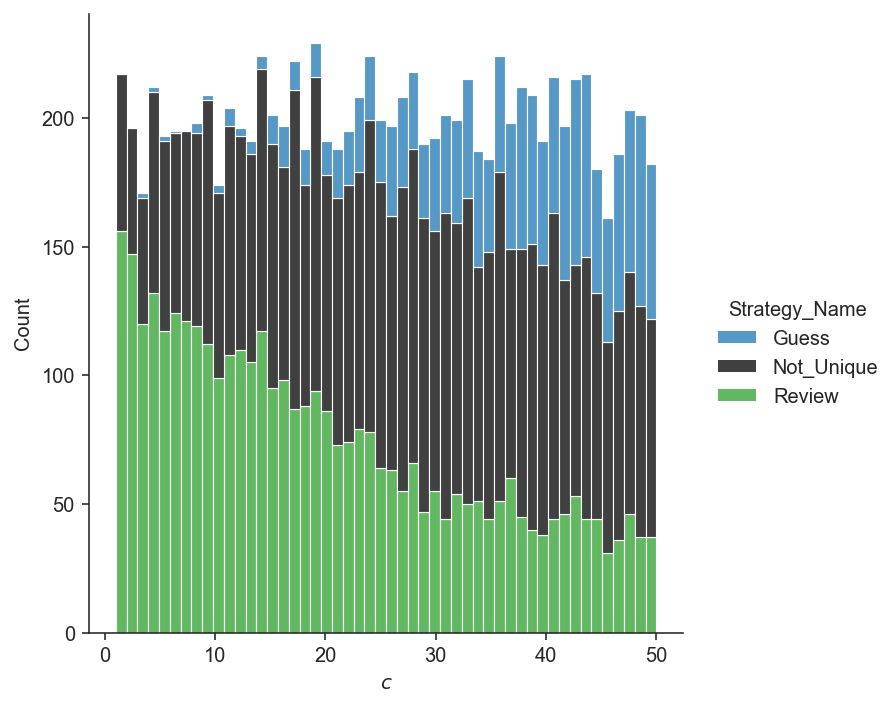

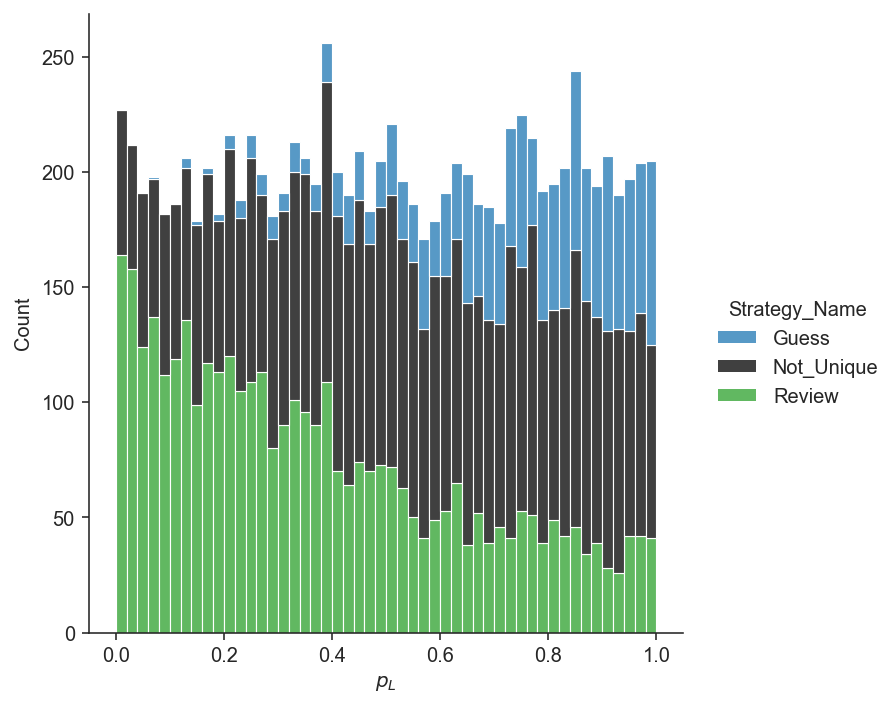

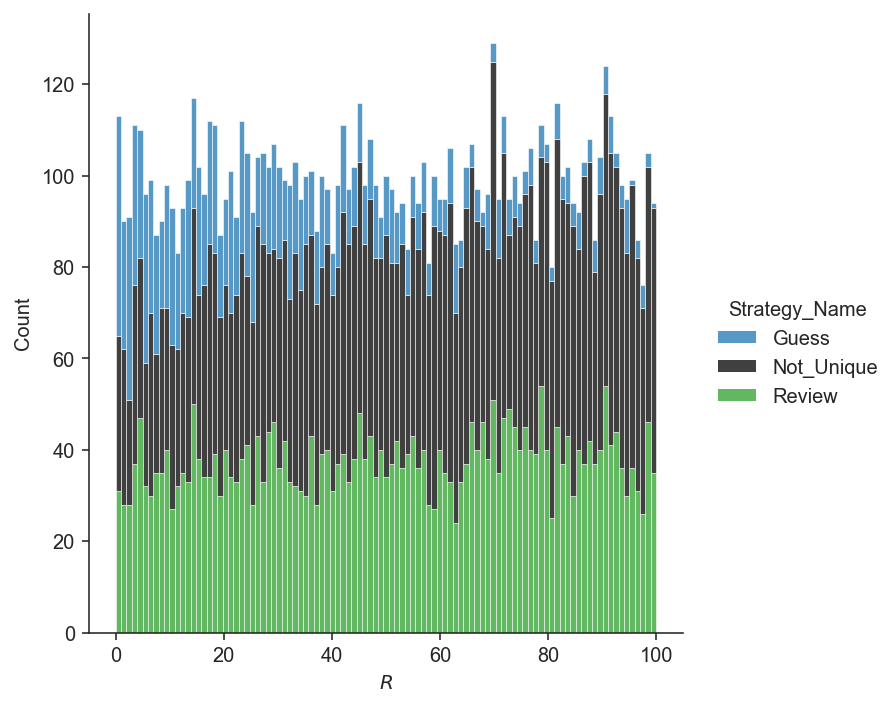

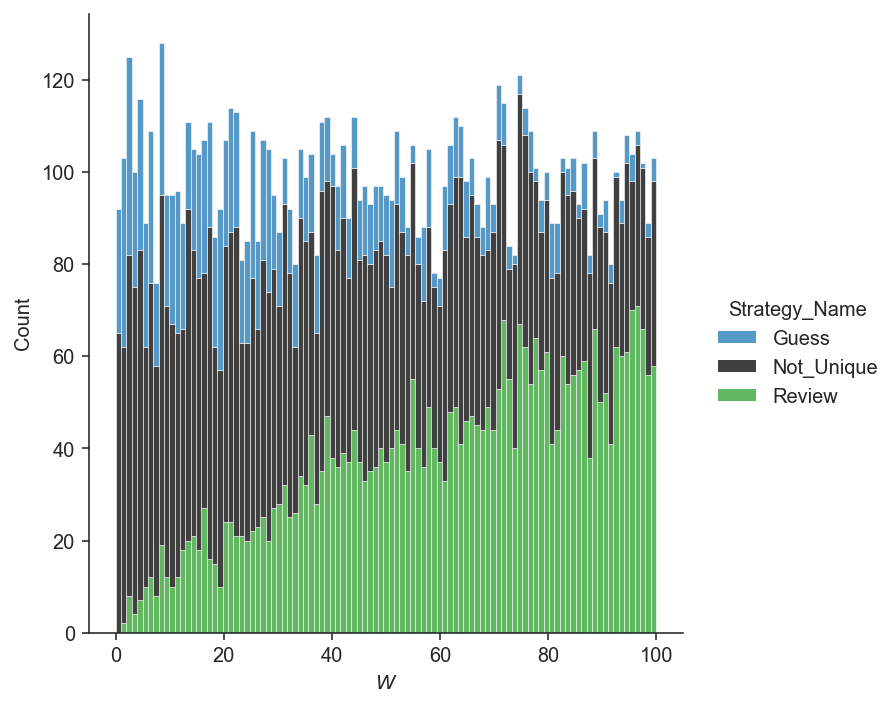

In [74]:
my_displot(x = 'c', filename = "c_counts", bins = 50, xlabel = '$c$') # c (1, 50")
my_displot(x = 'pL', filename = "pL_counts", bins = 50, xlabel = '$p_L$') # (0, 1)
my_displot(x = 'R', filename = "R_counts", bins = 101, xlabel = '$R$') # (0, 100)
my_displot(x = 'W', filename = "W_counts", bins = 101, xlabel = '$W$') # (0, 100)


Saving figure: pT_counts
Saving figure: pQ_counts


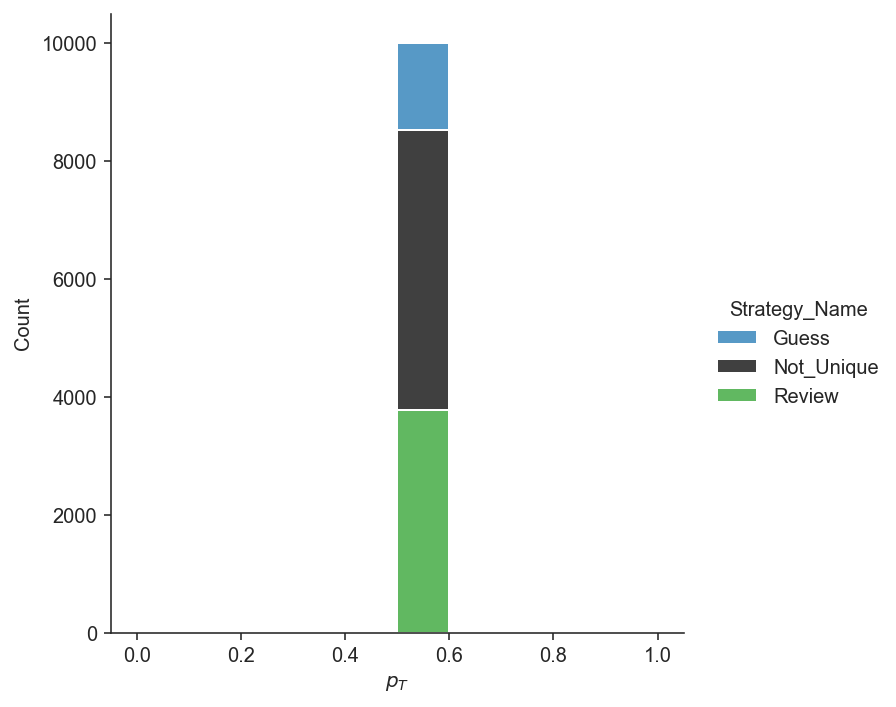

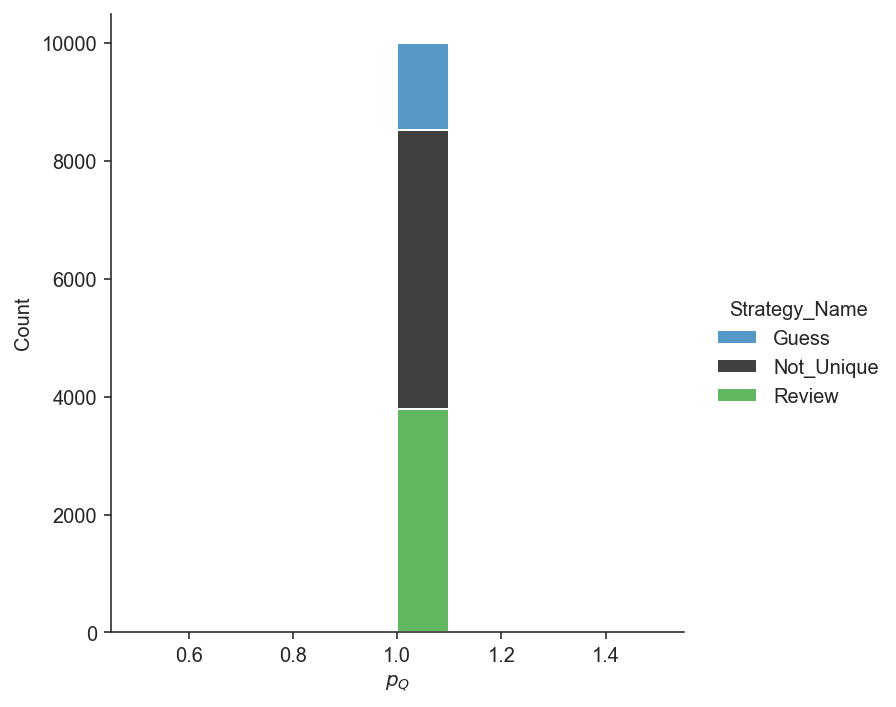

In [75]:
# Single value histogram
my_displot(x = 'pT', filename = "pT_counts", bins = 10, xlabel = '$p_T$') # 0.5
my_displot(x = 'pQ', filename = "pQ_counts", bins = 10, xlabel = '$p_Q$') # 1


Saving figure: pLc_vs_W_Guess_Text


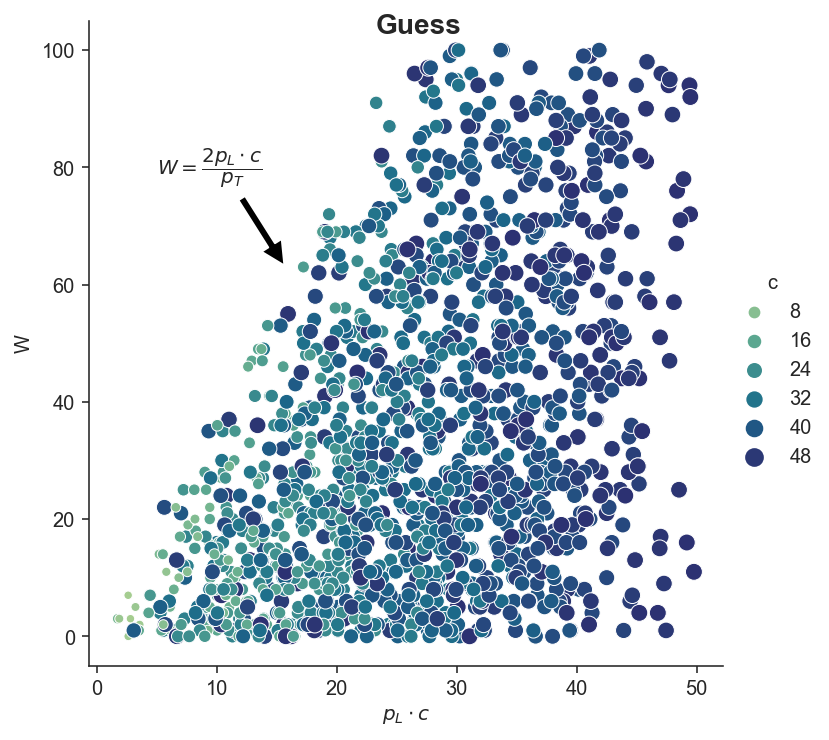

In [76]:
g = sns.relplot(data=one_nash_guess,
        x='pL*c', y='W',
        hue = 'c', 
        size = 'c', 
        palette = color_dict_params
        )
g.fig.suptitle("Guess", fontsize=14, fontweight='bold')
g.set_axis_labels('$p_L \cdot c$')
plt.annotate("$W = {\dfrac{2 p_L \cdot c}{p_T}}$", xy=(5, 80), xycoords='data', va='center', ha='left')
plt.annotate('', xy=(5*np.pi, 63), xytext=(12, 75),
        arrowprops=dict(facecolor='black', shrink=0.02))

save_fig('pLc_vs_W_Guess_Text')



Saving figure: pLc_vs_W_Review_Text


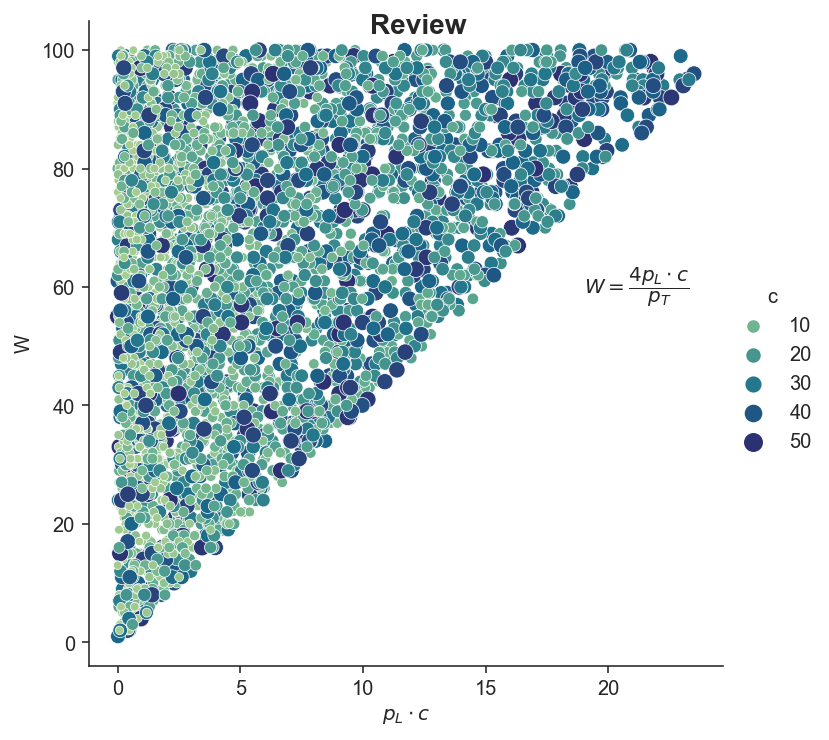

In [77]:
g = sns.relplot(data=one_nash_review,
        x='pL*c', y='W',
        hue = 'c', 
        size = 'c', 
        palette = color_dict_params
        )
g.fig.suptitle("Review", fontsize=14, fontweight='bold')
g.set_axis_labels('$p_L \cdot c$')
plt.annotate("$W = {\dfrac{4 p_L \cdot c}{p_T}}$", xy=(19, 60), xycoords='data', va='center', ha='left')
#plt.annotate('', xy=(2*np.pi, 60), xytext=(20, -1),
#        arrowprops=dict(facecolor='black', shrink=0.02))

save_fig('pLc_vs_W_Review_Text')


Saving figure: pLc_vs_W_Review
Saving figure: pLc_vs_W_Guess


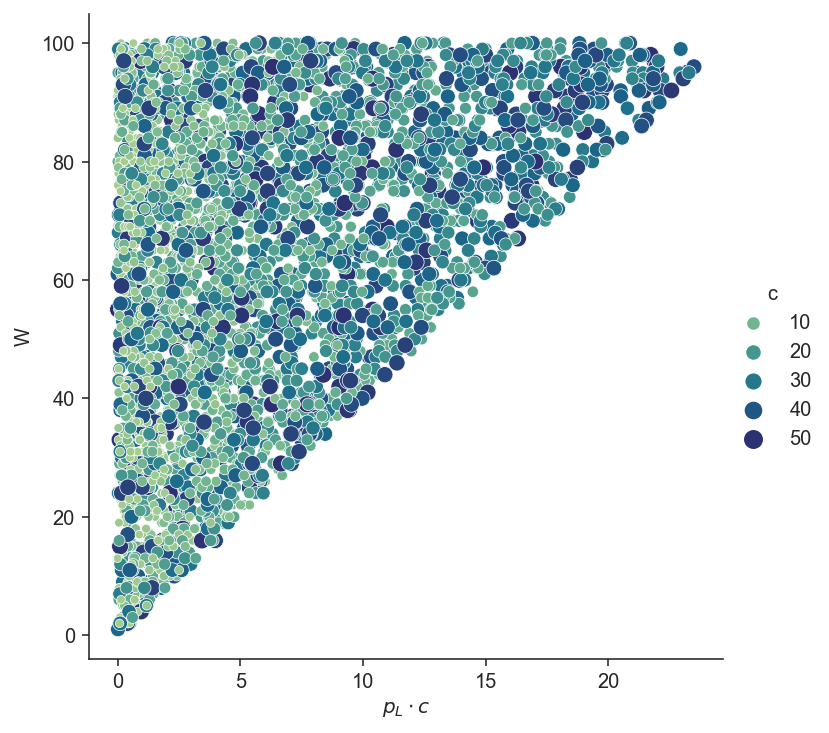

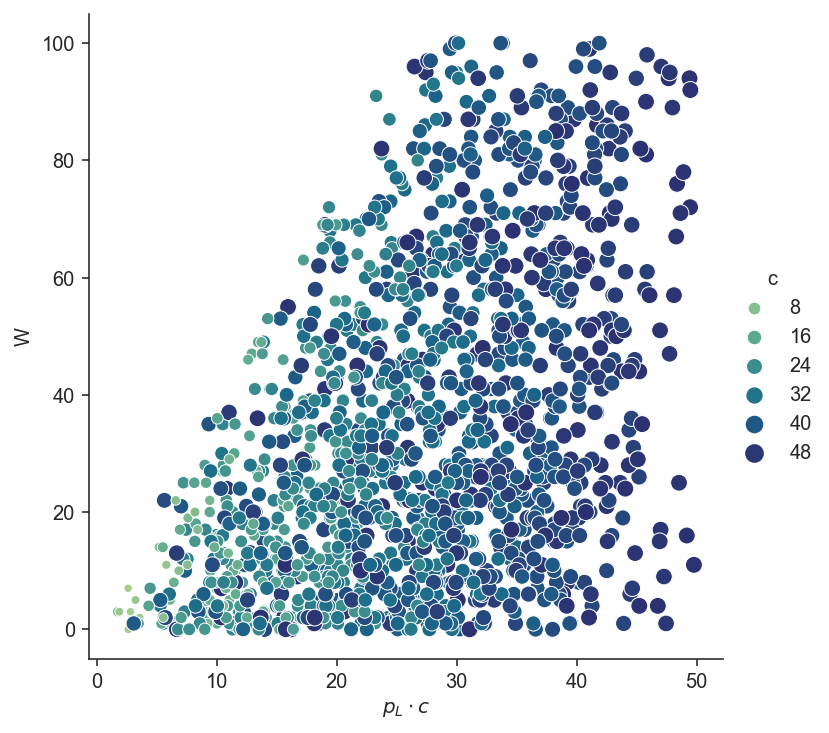

In [78]:

g = sns.relplot(data=one_nash_review, x='pL*c', y='W',
        hue = 'c', 
        size = 'c', 
        palette = color_dict_params
        )
g.set_axis_labels('$p_L \cdot c$')
save_fig('pLc_vs_W_Review')

g = sns.relplot(data=one_nash_guess, x='pL*c', y='W',
        hue = 'c', 
        size = 'c', 
        palette = color_dict_params
        )
g.set_axis_labels('$p_L \cdot c$')
save_fig('pLc_vs_W_Guess')


Saving figure: pLc_vs_R_Review
Saving figure: pLc_vs_R_Guess


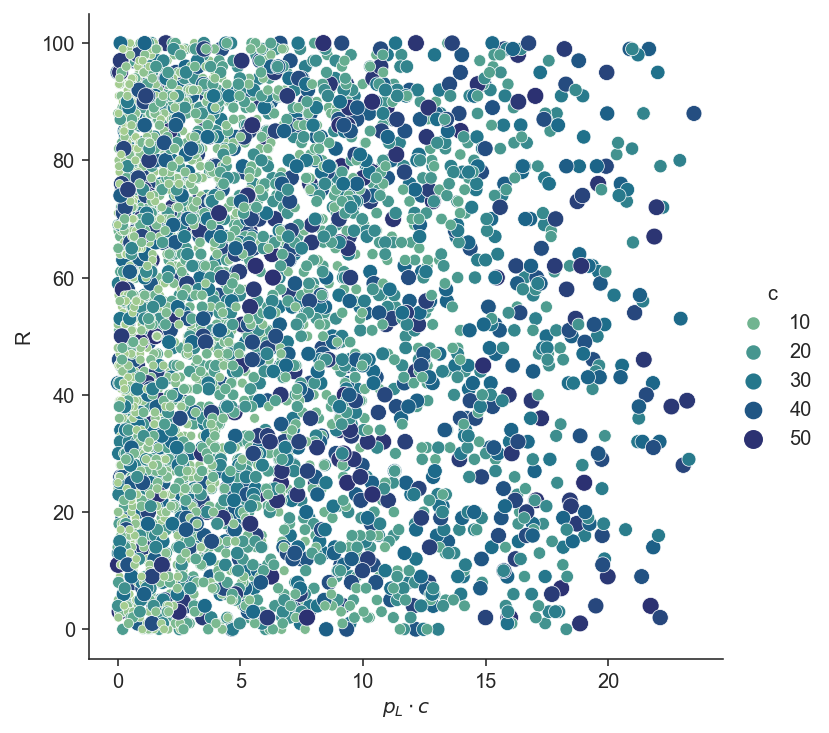

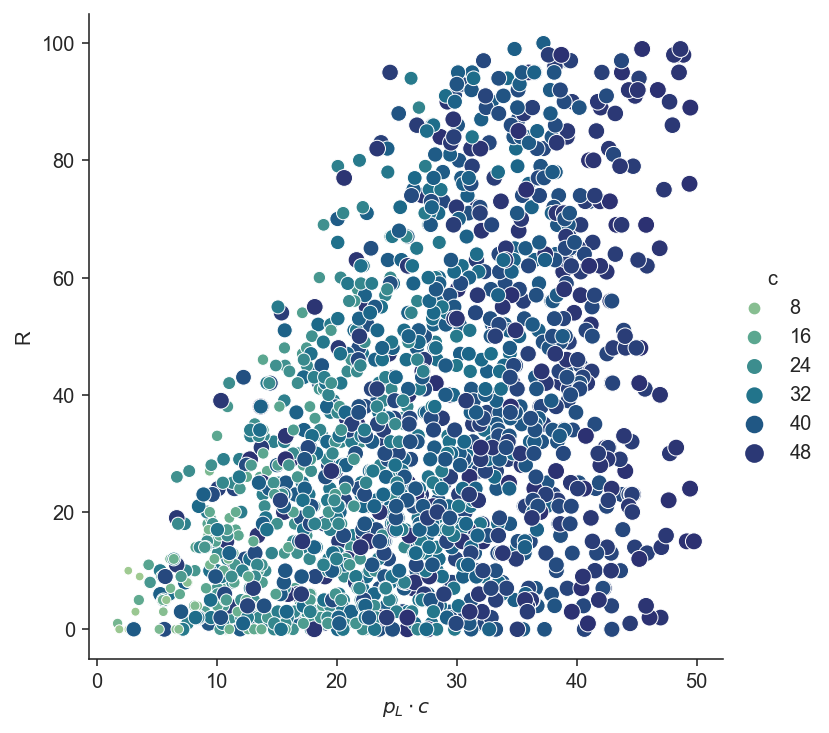

In [79]:
g = sns.relplot(data=one_nash_review, x='pL*c', y='R',
        hue = 'c', 
        size = 'c', 
        palette = color_dict_params
        )
g.set_axis_labels('$p_L \cdot c$')
save_fig('pLc_vs_R_Review')

g = sns.relplot(data=one_nash_guess, x='pL*c', y='R',
        hue = 'c', 
        size = 'c', 
        palette = color_dict_params
        )
g.set_axis_labels('$p_L \cdot c$')
save_fig('pLc_vs_R_Guess')